In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt 

In [9]:
ufo_data_df = pd.read_csv("Data/scrubbed.csv")
ufo_data_df.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [12]:
ufo_usa = ufo_data_df[ufo_data_df.country.eq("us")]
ufo_usa.head()


                 

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [13]:
ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,20:30,1949
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,21:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,20:00,1960
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,19:00,1961
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,23:45,1965


In [14]:


ufo_dates = ufo_usa[ufo_usa['Year'].between('1993', '2020')]
ufo_dates.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
56,10/10/1993 22:00,peoria,il,us,light,8,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.6936111,-89.588889,10,10,22:00,1993
57,10/10/1993 23:00,carthage,tn,us,other,60,less than 1 min,1 object with green and red lights,3/21/2003,36.2522222,-85.951667,10,10,23:00,1993
59,10/10/1994 18:30,burnt hills,ny,us,rectangle,120,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.9097222,-73.895556,10,10,18:30,1994
60,10/10/1994 22:00,pinebergen,ar,us,light,5,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.1027778,-91.992222,10,10,22:00,1994
62,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.0388889,-87.906389,10,10,19:45,1995


In [20]:
ufo_dates['shape'].replace('', np.nan, inplace=True)

In [21]:
ufo_dates.count()

datetime                59592
city                    59592
state                   59592
country                 59592
shape                   58131
duration (seconds)      59592
duration (hours/min)    59592
comments                59581
date posted             59592
latitude                59592
longitude               59592
Month                   59592
Day                     59592
Time                    59592
Year                    59592
dtype: int64

In [22]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      ufo_dates.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 datetime                   0
city                       0
state                      0
country                    0
shape                   1461
duration (seconds)         0
duration (hours/min)       0
comments                  11
date posted                0
latitude                   0
longitude                  0
Month                      0
Day                        0
Time                       0
Year                       0
dtype: int64


In [23]:
ufo_dates.dropna(subset=['shape'], inplace=True)
ufo_dates.count()

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datetime                58131
city                    58131
state                   58131
country                 58131
shape                   58131
duration (seconds)      58131
duration (hours/min)    58131
comments                58125
date posted             58131
latitude                58131
longitude               58131
Month                   58131
Day                     58131
Time                    58131
Year                    58131
dtype: int64

In [24]:
ufo_dates.to_csv(r'/Users/mwies/Desktop/github-repo/alien-anaylsis/project-1-alien-analysis\cleaned_ufo_data.csv', index = False)

In [26]:
cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [51]:
shape_df = cleaned_ufo_data['shape'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape_df

,UFO Shape,Counts
0,light,12837
1,triangle,6027
2,circle,5638
3,fireball,4996
4,unknown,4204
5,other,4027
6,sphere,3976
7,disk,2963
8,oval,2668
9,formation,1891


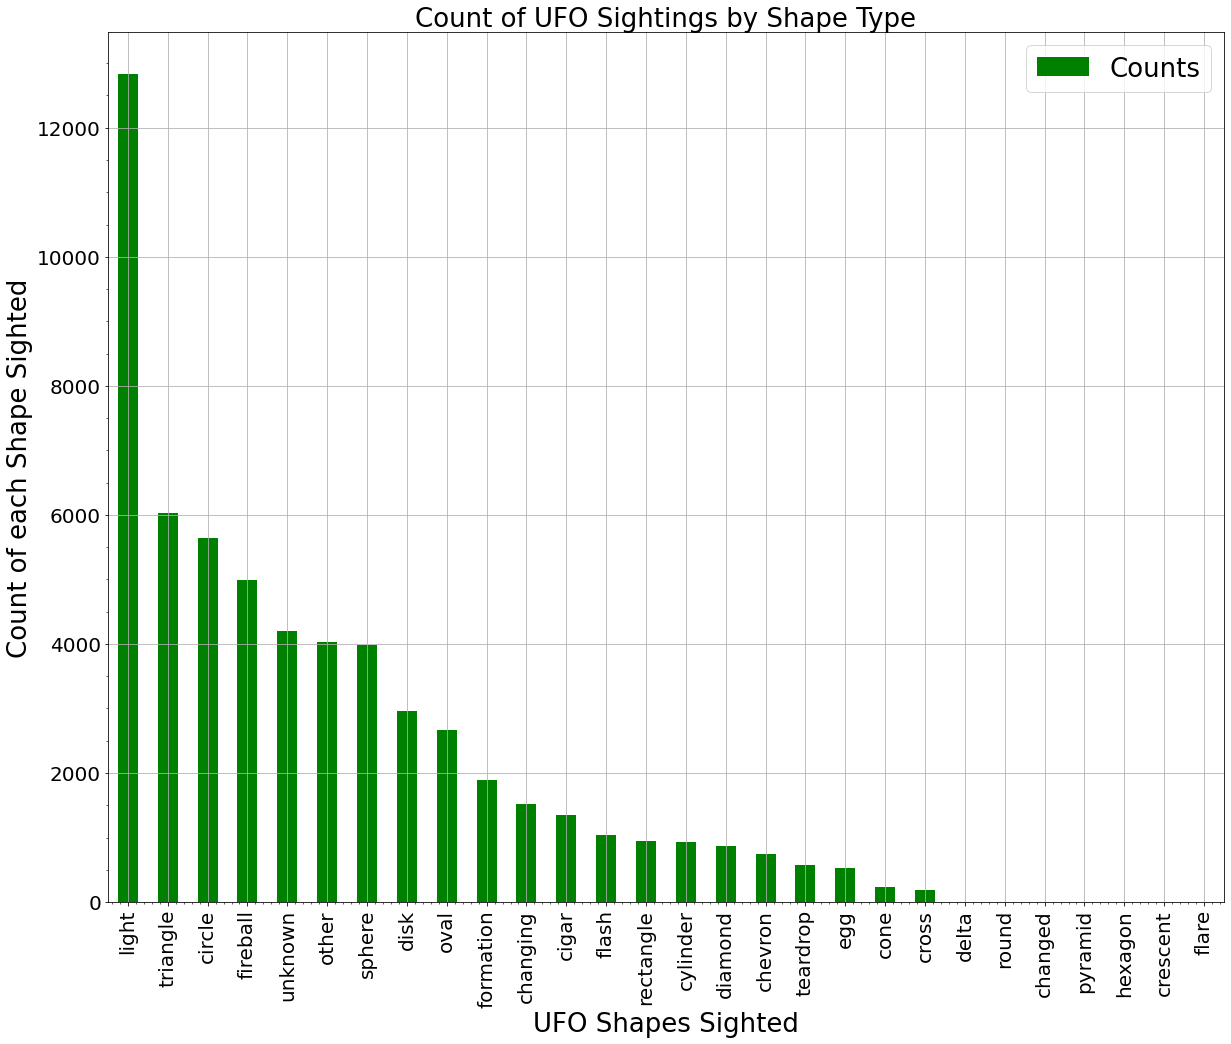

In [199]:
shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("UFO Shapes Sighted", fontsize=26)
plt.ylabel("Count of each Shape Sighted", fontsize=26)
plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26)
x_indexes = np.arange(len(shape_df))
plt.xticks(ticks=x_indexes, labels=shape_df["UFO Shape"])
plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()


In [91]:
shape_year = cleaned_ufo_data.groupby(['Year','shape']).size().reset_index().groupby('Year')[[0]].nunique()
#shape_year2 = shape_year.set_axis(["Year","Count of Unique Shapes"], axis=1, inplace=False)

shape_year.rename({'Year': 'Year', "0": 'Count of Unique Shapes'}, axis=1, inplace=True)
shape_year

,0
Year,
1993,14
1994,14
1995,17
1996,18
1997,19
1998,21
1999,21
2000,19
2001,21


In [138]:
#year_df = cleaned_ufo_data.groupby(['Year', 'shape']))

#year_df = cleaned_ufo_data.set_index('Year', inplace=True)

Index_data_df = pd.read_csv("cleaned_ufo_data.csv")
Index_data_df.head()



,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996


In [139]:
Index_data_df.set_index('shape', inplace=True)
Index_data_df.head()

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
light,10/10/1993 22:00,peoria,il,us,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
other,10/10/1993 23:00,carthage,tn,us,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
rectangle,10/10/1994 18:30,burnt hills,ny,us,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
light,10/10/1994 22:00,pinebergen,ar,us,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
triangle,10/10/1996 03:20,higginsville,mo,us,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996


In [143]:
year_light_df = Index_data_df.loc['light']

year_light_df

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
light,10/10/1993 22:00,peoria,il,us,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
light,10/10/1994 22:00,pinebergen,ar,us,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
light,10/10/1996 22:00,charleston,sc,us,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
light,10/10/1998 20:50,mooresville,nc,us,2.0,2 seconds,Star gazing in back yard with telescope and bi...,11/1/1998,35.584722,-80.810278,10,10,20:50,1998
light,10/10/1999 21:00,rachel,nv,us,10800.0,3 hours,Bright lights with incredible agility seen fro...,5/24/2005,37.644722,-115.742778,10,10,21:00,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
light,9/9/2012 20:30,mt. juliet,tn,us,120.0,2 minutes,Bright white light moving slowly across sky wi...,9/24/2012,36.200000,-86.518611,9,9,20:30,2012
light,9/9/2012 21:00,new york city (brooklyn),ny,us,1290.0,21:30,Glowing&#44 circular lights visible in the clo...,9/24/2012,40.714167,-74.006389,9,9,21:00,2012
light,9/9/2012 23:00,gainesville,ga,us,5.0,5 seconds,Ball of light,9/24/2012,34.297778,-83.824167,9,9,23:00,2012


In [163]:
year_count_light = year_light_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_light = year_count_light.sort_values('Year')

year_count_light


,Year,Counts
21,1993,30
20,1994,44
19,1995,72
18,1996,86
17,1997,222
16,1998,264
15,1999,431
13,2000,459
11,2001,539
12,2002,506


In [145]:
year_triangle_df = Index_data_df.loc['triangle']

year_triangle_df

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
shape,,,,,,,,,,,,,,
triangle,10/10/1996 03:20,higginsville,mo,us,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
triangle,10/10/1997 20:00,bonaire,ga,us,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997
triangle,10/10/1998 20:30,spokane (about 30 miles sw of&#44i-90&#44 mayb...,wa,us,600.0,10 minutes,Dark boomerange object seen for ten minutes ho...,8/5/2001,47.658889,-117.425000,10,10,20:30,1998
triangle,10/10/2001 03:00,rockwell city,ia,us,240.0,4 min.s,Large&#44silent&#44slow&#44low to the ground d...,7/1/2002,42.395278,-94.633611,10,10,03:00,2001
triangle,10/10/2001 22:00,phoenix,az,us,60.0,less then a minute,Triangle shaped craft spotted flying west to e...,11/20/2001,33.448333,-112.073333,10,10,22:00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
triangle,9/9/2009 21:40,boyne city,mi,us,360.0,6 min.,candy cane shape across sky followed by trian...,12/12/2009,45.216667,-85.013889,9,9,21:40,2009
triangle,9/9/2012 04:43,murfreesboro,tn,us,7200.0,2 hours,Triangular shape white light with red and gree...,9/24/2012,35.845556,-86.390278,9,9,04:43,2012
triangle,9/9/2012 05:35,malden,ma,us,60.0,1 minute,Triangular in shape. Moving forward and flying...,9/24/2012,42.425000,-71.066667,9,9,05:35,2012


In [164]:
year_count_triangle = year_triangle_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_triangle = year_count_triangle.sort_values('Year')

year_count_triangle

,Year,Counts
21,1993,49
20,1994,62
19,1995,71
18,1996,79
16,1997,164
17,1998,156
14,1999,231
13,2000,244
11,2001,273
12,2002,264


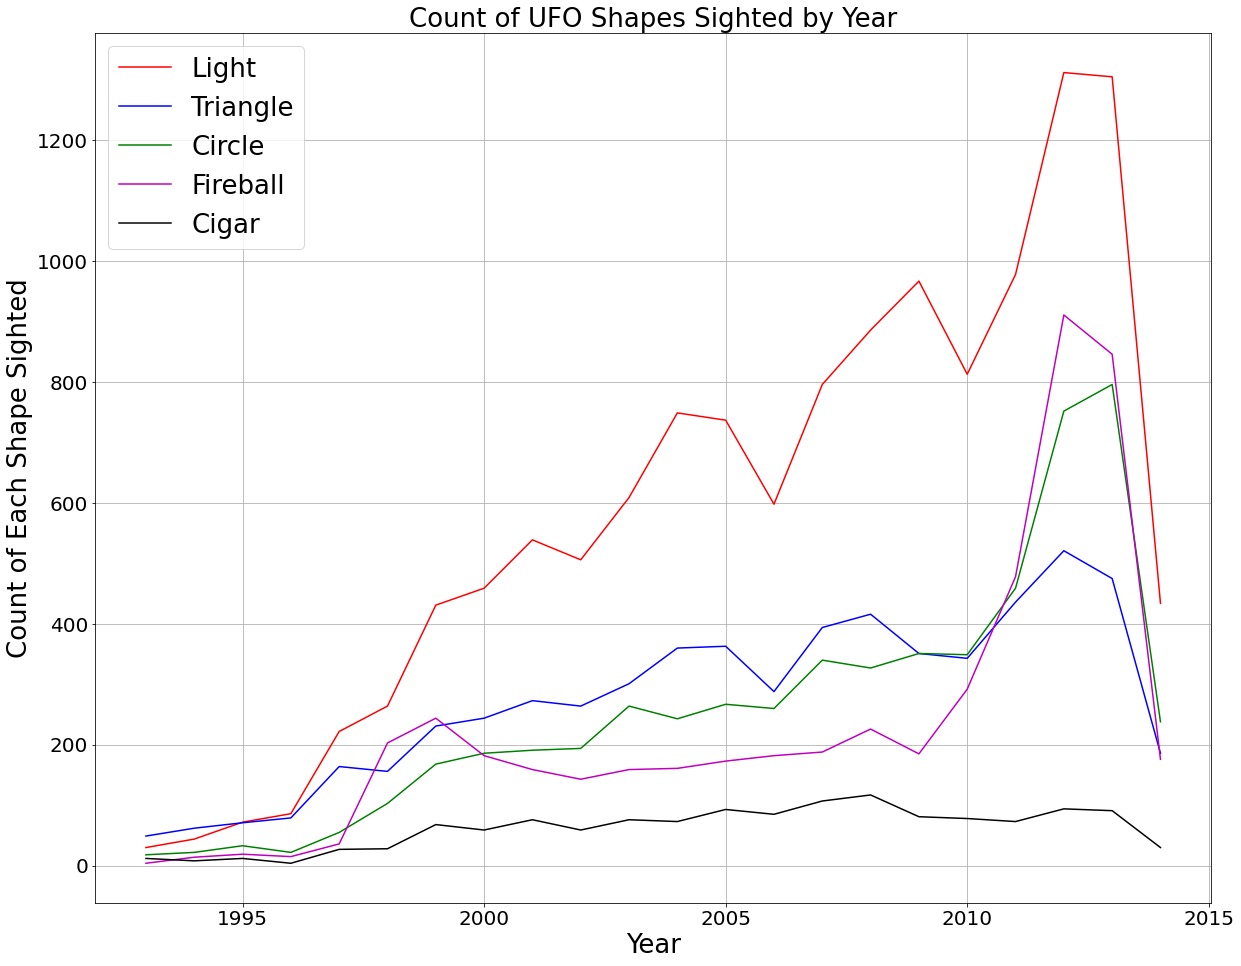

In [198]:
years = year_count_triangle['Year']
plt.plot(years, year_count_light['Counts'], color='r', label="Light")
plt.plot(years, year_count_triangle['Counts'], color='b', label="Triangle")
plt.plot(years, year_count_circle['Counts'], color='g', label="Circle")
plt.plot(years, year_count_fireball['Counts'], color='m', label="Fireball")
plt.plot(years, year_count_cigar['Counts'], color='k', label="Cigar")

#plt.rcParams.update({'font.size': 20})

plt.xlabel("Year", fontsize=26)
plt.ylabel("Count of Each Shape Sighted", fontsize=26)
plt.title("Count of UFO Shapes Sighted by Year", fontsize=26)


plt.grid()
plt.legend(fontsize=26)
plt.tight_layout

plt.savefig("Count of UFO Shapes Sighted by Year.png")
plt.show()

In [192]:
year_circle_df = Index_data_df.loc['circle']

year_count_circle = year_circle_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_circle = year_count_circle.sort_values('Year')

year_count_circle


,Year,Counts
21,1993,18
19,1994,22
18,1995,33
20,1996,22
17,1997,55
16,1998,103
15,1999,168
14,2000,186
13,2001,191
12,2002,194


In [193]:
year_fireball_df = Index_data_df.loc['fireball']

year_count_fireball = year_fireball_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_fireball = year_count_fireball.sort_values('Year')

year_count_fireball


,Year,Counts
21,1993,4
20,1994,14
18,1995,19
19,1996,15
17,1997,36
6,1998,203
4,1999,244
10,2000,182
14,2001,159
16,2002,143


In [194]:
year_cigar_df = Index_data_df.loc['cigar']

year_count_cigar = year_cigar_df['Year'].value_counts().rename_axis('Year').reset_index(name="Counts")

year_count_cigar = year_count_cigar.sort_values('Year')

year_count_cigar

,Year,Counts
19,1993,12
20,1994,8
18,1995,12
21,1996,4
17,1997,27
16,1998,28
12,1999,68
14,2000,59
9,2001,76
13,2002,59


In [3]:
cleaned_ufo_data = pd.read_csv("cleaned_ufo_data.csv")
cleaned_ufo_data.head(30)


#year_df = cleaned_ufo_data.groupby(['Year', 'shape']))

#year_df = cleaned_ufo_data.set_index('Year', inplace=True)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1993 22:00,peoria,il,us,light,8.0,8 seconds,Light over Peoria&#44 IL that moves slowly&#44...,10/11/2005,40.693611,-89.588889,10,10,22:00,1993
1,10/10/1993 23:00,carthage,tn,us,other,60.0,less than 1 min,1 object with green and red lights,3/21/2003,36.252222,-85.951667,10,10,23:00,1993
2,10/10/1994 18:30,burnt hills,ny,us,rectangle,120.0,2 minutes,Giant rectangular craft (resembling an upside-...,10/23/2013,42.909722,-73.895556,10,10,18:30,1994
3,10/10/1994 22:00,pinebergen,ar,us,light,5.0,5 seconds,Round&#44 bright&#44 low flying object silentl...,2/18/2001,34.102778,-91.992222,10,10,22:00,1994
4,10/10/1996 03:20,higginsville,mo,us,triangle,3.0,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.072500,-93.716944,10,10,03:20,1996
5,10/10/1996 22:00,charleston,sc,us,light,300.0,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.776389,-79.931111,10,10,22:00,1996
6,10/10/1996 22:30,monroe county,oh,us,cylinder,60.0,1 minute,Looked like it went through the hillside,7/8/2004,39.440278,-84.362222,10,10,22:30,1996
7,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111,10,10,16:00,1997
8,10/10/1997 17:00,mesa,az,us,sphere,30.0,30 seconds,A small dark purple quad-thruster craft hoveri...,2/14/2008,33.422222,-111.821944,10,10,17:00,1997
9,10/10/1997 20:00,bonaire,ga,us,triangle,300.0,<5 minutes,Triangular Object Sighted at Very Close Range,2/1/2007,32.543611,-83.596111,10,10,20:00,1997


In [4]:
smaller_data = cleaned_ufo_data[["shape", "Year"]]

smaller_data.head()

,shape,Year
0,light,1993
1,other,1993
2,rectangle,1994
3,light,1994
4,triangle,1996


In [5]:
other_list = ["flash", "rectangle", "cylinder", "diamond", "chevron", "teardrop", "egg", "cone", "cross", "delta", "round", "changed", "pyramid", "hexagon", "crescent", "flare"]

smaller_data['Shape_2'] = ""

for index, row in smaller_data.iterrows():
    shp = row["shape"]     
    if shp in other_list:
        smaller_data.loc[index, "Shape_2"] = "Other"
    else: 
        smaller_data.loc[index, "Shape_2"] = shp
        

C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mwies\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [6]:
smaller_data.head()

,shape,Year,Shape_2
0,light,1993,light
1,other,1993,other
2,rectangle,1994,Other
3,light,1994,light
4,triangle,1996,triangle


In [7]:
shape2_df = smaller_data['Shape_2'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape2_df

,UFO Shape,Counts
0,light,12837
1,Other,6040
2,triangle,6027
3,circle,5638
4,fireball,4996
5,unknown,4204
6,other,4027
7,sphere,3976
8,disk,2963
9,oval,2668


In [11]:
year_group_df = smaller_data.groupby(['Shape_2', 'Year'])
year_group_df

count_year_df = year_group_df.count()

count_year_df



shape
Shape_2 Year       
Other   1993     29
        1994     34
        1995     41
        1996     59
        1997     91
...             ...
unknown 2010    267
        2011    304
        2012    403
        2013    373
        2014    141

[286 rows x 1 columns]

In [12]:
unstack_data = count_year_df.unstack(level=0)
unstack_data

shape                                                                 \
Shape_2 Other changing cigar circle disk fireball formation light other oval   
Year                                                                           
1993       29        2    12     18   15        4         9    30    25    9   
1994       34        8     8     22   41       14         3    44    22   11   
1995       41        9    12     33   32       19         8    72    38   20   
1996       59       13     4     22   41       15        13    86    39   17   
1997       91       12    27     55   65       36        59   222   105   36   
1998      146       34    28    103   79      203        41   264   101   55   
1999      250       52    68    168  133      244        66   431   184   82   
2000      249       58    59    186  143      182        58   459   178   86   
2001      293       63    76    191  141      159        90   539   177  118   
2002      311       81    59    194  159      143        61   506   188  105   
2003      324       85    76    264  195      159        95   609   242  155   
2004      338       96    73    243  211      161       114   749   249  142   
2005      332      108    93    267  187      173        96   737   264  126   
2006      315       88    85    260  164      182        90   598   206  149   
2007      343       84   107    340  198      188       100   796   230  182   
2008      447      128   117    327  227      226       130   886   260  214   
2009      351       90    81    351  166      185       120   967   254  174   
2010      339       98    78    349  167      292        90   813   263  160   
2011      420       86    73    459  163      478       146   978   264  206   
2012      600      149    94    752  202      911       186  1312   319  300   
2013      547      128    91    796  167      846       238  1305   303  241   
2014      181       41    30    238   67      176        78   434   116   80   

                                 
Shape_2 sphere triangle unknown  
Year                             
1993        17       49       7  
1994        25       62      22  
1995        21       71      37  
1996        24       79      19  
1997        62      164      42  
1998       116      156      68  
1999       140      231     148  
2000       105      244     142  
2001       139      273     154  
2002       139      264     189  
2003       181      301     230  
2004       211      360     257  
2005       186      363     260  
2006       179      288     256  
2007       207      394     276  
2008       257      416     336  
2009       249      351     273  
2010       248      343     267  
2011       320      436     304  
2012       504      521     403  
2013       483      475     373  
2014       163      186     141

In [46]:
unstack_data_rotate = unstack_data.T
unstack_data_rotate

Year             1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  \
      Shape_2                                                                 
shape Other        29    34    41    59    91   146   250   249   293   311   
      changing      2     8     9    13    12    34    52    58    63    81   
      cigar        12     8    12     4    27    28    68    59    76    59   
      circle       18    22    33    22    55   103   168   186   191   194   
      disk         15    41    32    41    65    79   133   143   141   159   
      fireball      4    14    19    15    36   203   244   182   159   143   
      formation     9     3     8    13    59    41    66    58    90    61   
      light        30    44    72    86   222   264   431   459   539   506   
      other        25    22    38    39   105   101   184   178   177   188   
      oval          9    11    20    17    36    55    82    86   118   105   
      sphere       17    25    21    24    62   116   140   105   139   139   
      triangle     49    62    71    79   164   156   231   244   273   264   
      unknown       7    22    37    19    42    68   148   142   154   189   

Year             ...  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
      Shape_2    ...                                                         
shape Other      ...   332   315   343   447   351   339   420   600   547   
      changing   ...   108    88    84   128    90    98    86   149   128   
      cigar      ...    93    85   107   117    81    78    73    94    91   
      circle     ...   267   260   340   327   351   349   459   752   796   
      disk       ...   187   164   198   227   166   167   163   202   167   
      fireball   ...   173   182   188   226   185   292   478   911   846   
      formation  ...    96    90   100   130   120    90   146   186   238   
      light      ...   737   598   796   886   967   813   978  1312  1305   
      other      ...   264   206   230   260   254   263   264   319   303   
      oval       ...   126   149   182   214   174   160   206   300   241   
      sphere     ...   186   179   207   257   249   248   320   504   483   
      triangle   ...   363   288   394   416   351   343   436   521   475   
      unknown    ...   260   256   276   336   273   267   304   403   373   

Year             2014  
      Shape_2          
shape Other       181  
      changing     41  
      cigar        30  
      circle      238  
      disk         67  
      fireball    176  
      formation    78  
      light       434  
      other       116  
      oval         80  
      sphere      163  
      triangle    186  
      unknown     141  

[13 rows x 22 columns]

In [49]:
percent_data = unstack_data_rotate/unstack_data_rotate.sum()*100
percent_data

Year                  1993       1994       1995       1996       1997  \
      Shape_2                                                            
shape Other      12.831858  10.759494   9.927361  13.689095   9.323770   
      changing    0.884956   2.531646   2.179177   3.016241   1.229508   
      cigar       5.309735   2.531646   2.905569   0.928074   2.766393   
      circle      7.964602   6.962025   7.990315   5.104408   5.635246   
      disk        6.637168  12.974684   7.748184   9.512761   6.659836   
      fireball    1.769912   4.430380   4.600484   3.480278   3.688525   
      formation   3.982301   0.949367   1.937046   3.016241   6.045082   
      light      13.274336  13.924051  17.433414  19.953596  22.745902   
      other      11.061947   6.962025   9.200969   9.048724  10.758197   
      oval        3.982301   3.481013   4.842615   3.944316   3.688525   
      sphere      7.522124   7.911392   5.084746   5.568445   6.352459   
      triangle   21.681416  19.620253  17.191283  18.329466  16.803279   
      unknown     3.097345   6.962025   8.958838   4.408353   4.303279   

Year                  1998       1999       2000       2001       2002  ...  \
      Shape_2                                                           ...   
shape Other      10.473458  11.379153  11.586785  12.142561  12.963735  ...   
      changing    2.439024   2.366864   2.698930   2.610858   3.376407  ...   
      cigar       2.008608   3.095130   2.745463   3.149606   2.459358  ...   
      circle      7.388809   7.646791   8.655188   7.915458   8.086703  ...   
      disk        5.667145   6.053710   6.654258   5.843349   6.627762  ...   
      fireball   14.562410  11.106054   8.469055   6.589308   5.960817  ...   
      formation   2.941176   3.004096   2.698930   3.729797   2.542726  ...   
      light      18.938307  19.617660  21.358772  22.337339  21.092122  ...   
      other       7.245337   8.375057   8.282922   7.335267   7.836599  ...   
      oval        3.945481   3.732362   4.001861   4.890178   4.376824  ...   
      sphere      8.321377   6.372326   4.885993   5.760464   5.794081  ...   
      triangle   11.190818  10.514338  11.354118  11.313717  11.004585  ...   
      unknown     4.878049   6.736459   6.607725   6.382097   7.878283  ...   

Year                  2005       2006       2007       2008       2009  \
      Shape_2                                                            
shape Other      10.401003  11.013986   9.956459  11.256610   9.717608   
      changing    3.383459   3.076923   2.438316   3.223369   2.491694   
      cigar       2.913534   2.972028   3.105951   2.946361   2.242525   
      circle      8.364662   9.090909   9.869376   8.234702   9.717608   
      disk        5.858396   5.734266   5.747460   5.716444   4.595792   
      fireball    5.419799   6.363636   5.457184   5.691262   5.121816   
      formation   3.007519   3.146853   2.902758   3.273735   3.322259   
      light      23.088972  20.909091  23.105951  22.311760  26.771872   
      other       8.270677   7.202797   6.676343   6.547469   7.032115   
      oval        3.947368   5.209790   5.283019   5.389071   4.817276   
      sphere      5.827068   6.258741   6.008708   6.471921   6.893688   
      triangle   11.372180  10.069930  11.436865  10.475951   9.717608   
      unknown     8.145363   8.951049   8.011611   8.461345   7.558140   

Year                  2010       2011       2012       2013       2014  
      Shape_2                                                           
shape Other       9.666382   9.693053   9.595394   9.127315   9.373382  
      changing    2.794411   1.984768   2.382856   2.135825   2.123252  
      cigar       2.224123   1.684745   1.503278   1.518438   1.553599  
      circle      9.951526  10.593123  12.026227  13.282163  12.325220  
      disk        4.761905   3.761828   3.230449   2.786584   3.469705  
      fireball    8.326205  11.031618  14.569007  14.116469   9.114448  
      fo

In [31]:
unstack_data['sum'] = unstack_data[unstack_data.columns].sum(axis=1)
unstack_data

shape                                                                 \
Shape_2 Other changing cigar circle disk fireball formation light other oval   
Year                                                                           
1993       29        2    12     18   15        4         9    30    25    9   
1994       34        8     8     22   41       14         3    44    22   11   
1995       41        9    12     33   32       19         8    72    38   20   
1996       59       13     4     22   41       15        13    86    39   17   
1997       91       12    27     55   65       36        59   222   105   36   
1998      146       34    28    103   79      203        41   264   101   55   
1999      250       52    68    168  133      244        66   431   184   82   
2000      249       58    59    186  143      182        58   459   178   86   
2001      293       63    76    191  141      159        90   539   177  118   
2002      311       81    59    194  159      143        61   506   188  105   
2003      324       85    76    264  195      159        95   609   242  155   
2004      338       96    73    243  211      161       114   749   249  142   
2005      332      108    93    267  187      173        96   737   264  126   
2006      315       88    85    260  164      182        90   598   206  149   
2007      343       84   107    340  198      188       100   796   230  182   
2008      447      128   117    327  227      226       130   886   260  214   
2009      351       90    81    351  166      185       120   967   254  174   
2010      339       98    78    349  167      292        90   813   263  160   
2011      420       86    73    459  163      478       146   978   264  206   
2012      600      149    94    752  202      911       186  1312   319  300   
2013      547      128    91    796  167      846       238  1305   303  241   
2014      181       41    30    238   67      176        78   434   116   80   

                                  sum  
Shape_2 sphere triangle unknown        
Year                                   
1993        17       49       7   226  
1994        25       62      22   316  
1995        21       71      37   413  
1996        24       79      19   431  
1997        62      164      42   976  
1998       116      156      68  1394  
1999       140      231     148  2197  
2000       105      244     142  2149  
2001       139      273     154  2413  
2002       139      264     189  2399  
2003       181      301     230  2916  
2004       211      360     257  3204  
2005       186      363     260  3192  
2006       179      288     256  2860  
2007       207      394     276  3445  
2008       257      416     336  3971  
2009       249      351     273  3612  
2010       248      343     267  3507  
2011       320      436     304  4333  
2012       504      521     403  6253  
2013       483      475     373  5993  
2014       163      186     141  1931

In [51]:
unstack_data_unrotate = percent_data.T
unstack_data_unrotate

shape                                                       \
Shape_2      Other  changing     cigar     circle       disk   fireball   
Year                                                                      
1993     12.831858  0.884956  5.309735   7.964602   6.637168   1.769912   
1994     10.759494  2.531646  2.531646   6.962025  12.974684   4.430380   
1995      9.927361  2.179177  2.905569   7.990315   7.748184   4.600484   
1996     13.689095  3.016241  0.928074   5.104408   9.512761   3.480278   
1997      9.323770  1.229508  2.766393   5.635246   6.659836   3.688525   
1998     10.473458  2.439024  2.008608   7.388809   5.667145  14.562410   
1999     11.379153  2.366864  3.095130   7.646791   6.053710  11.106054   
2000     11.586785  2.698930  2.745463   8.655188   6.654258   8.469055   
2001     12.142561  2.610858  3.149606   7.915458   5.843349   6.589308   
2002     12.963735  3.376407  2.459358   8.086703   6.627762   5.960817   
2003     11.111111  2.914952  2.606310   9.053498   6.687243   5.452675   
2004     10.549313  2.996255  2.278402   7.584270   6.585518   5.024969   
2005     10.401003  3.383459  2.913534   8.364662   5.858396   5.419799   
2006     11.013986  3.076923  2.972028   9.090909   5.734266   6.363636   
2007      9.956459  2.438316  3.105951   9.869376   5.747460   5.457184   
2008     11.256610  3.223369  2.946361   8.234702   5.716444   5.691262   
2009      9.717608  2.491694  2.242525   9.717608   4.595792   5.121816   
2010      9.666382  2.794411  2.224123   9.951526   4.761905   8.326205   
2011      9.693053  1.984768  1.684745  10.593123   3.761828  11.031618   
2012      9.595394  2.382856  1.503278  12.026227   3.230449  14.569007   
2013      9.127315  2.135825  1.518438  13.282163   2.786584  14.116469   
2014      9.373382  2.123252  1.553599  12.325220   3.469705   9.114448   

                                                                        \
Shape_2 formation      light      other      oval    sphere   triangle   
Year                                                                     
1993     3.982301  13.274336  11.061947  3.982301  7.522124  21.681416   
1994     0.949367  13.924051   6.962025  3.481013  7.911392  19.620253   
1995     1.937046  17.433414   9.200969  4.842615  5.084746  17.191283   
1996     3.016241  19.953596   9.048724  3.944316  5.568445  18.329466   
1997     6.045082  22.745902  10.758197  3.688525  6.352459  16.803279   
1998     2.941176  18.938307   7.245337  3.945481  8.321377  11.190818   
1999     3.004096  19.617660   8.375057  3.732362  6.372326  10.514338   
2000     2.698930  21.358772   8.282922  4.001861  4.885993  11.354118   
2001     3.729797  22.337339   7.335267  4.890178  5.760464  11.313717   
2002     2.542726  21.092122   7.836599  4.376824  5.794081  11.004585   
2003     3.257888  20.884774   8.299040  5.315501  6.207133  10.322359   
2004     3.558052  23.377029   7.771536  4.431960  6.585518  11.235955   
2005     3.007519  23.088972   8.270677  3.947368  5.827068  11.372180   
2006     3.146853  20.909091   7.202797  5.209790  6.258741  10.069930   
2007     2.902758  23.105951   6.676343  5.283019  6.008708  11.436865   
2008     3.273735  22.311760   6.547469  5.389071  6.471921  10.475951   
2009     3.322259  26.771872   7.032115  4.817276  6.893688   9.717608   
2010     2.566296  23.182207   7.499287  4.562304  7.071571   9.780439   
2011     3.369490  22.570967   6.092776  4.754212  7.385183  10.062312   
2012     2.974572  20.981929   5.101551  4.797697  8.060131   8.332001   
2013     3.971300  21.775405   5.055899  4.021358  8.059403   7.925914   
2014     4.039358  22.475401   6.007250  4.142931  8.441222   9.632315   

                   
Shape_2   unknown  
Year               
1993     3.097345  
1994     6.962025  
1995     8.958838  
1996     4.408353  
1997     4.303279  
1998     4.878049  
1999     6.736459  
2000     6.607725  
2001     6.382097  
2002     7.878283  
2003     7.887517  
2004  

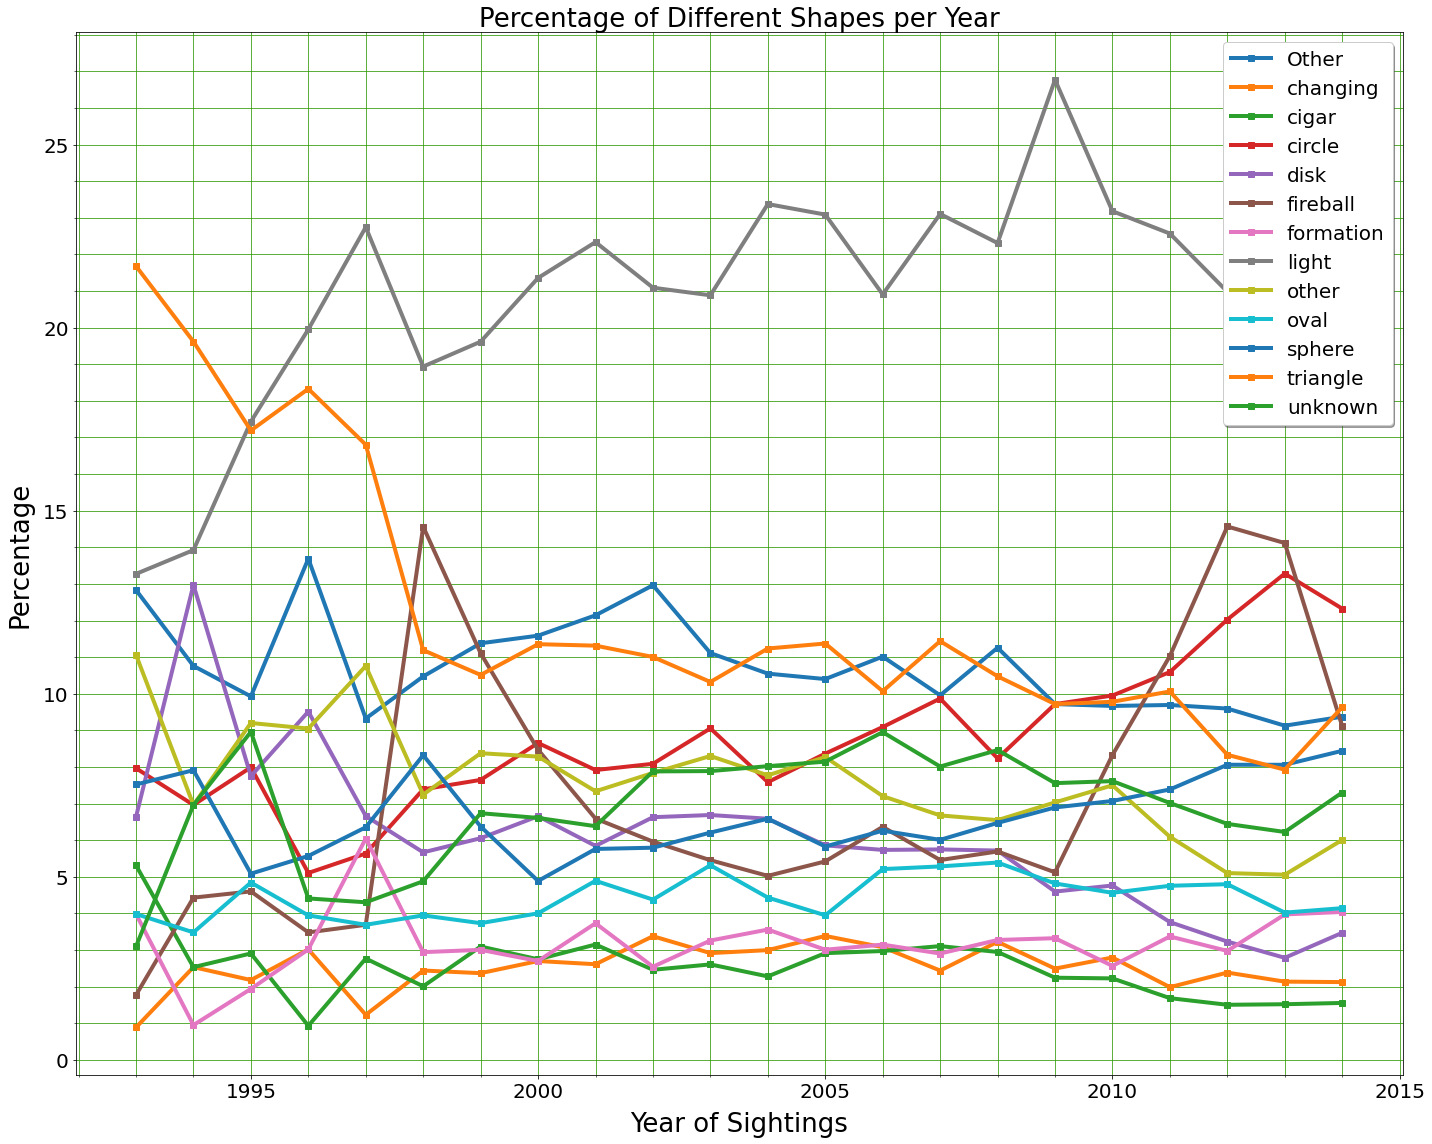

In [101]:
unstack_data_unrotate.plot(kind='line', marker="s", linewidth=4, figsize=(20,16), fontsize=20)

plt.xlabel("Year of Sightings", fontsize=26, labelpad = 10)
plt.ylabel("Percentage", fontsize=26, labelpad = 10)
plt.title("Percentage of Different Shapes per Year", fontsize=26)

plt.minorticks_on()
plt.grid(b=True, which='major', color='#369c0b', linestyle='-')
plt.grid(b=True, which='minor', color='#369c0b', linestyle='-')
plt.legend(["Other", "changing", "cigar", "circle", "disk", "fireball", "formation", "light", "other", "oval", "sphere", "triangle", "unknown"], loc="upper right", shadow=True, numpoints=True, fontsize=20)

plt.tight_layout()


#plt.savefig("Percentage of Different Shapes per Year without grid.png")


plt.show()
